In [2]:
import numpy as np
import matplotlib.pyplot as plt

N = 100
init_val = np.ones(N)

N_it = 1000000

for i in range(N_it):
    
    pick = np.random.randint(0, N, 2)
    if pick[0] == pick[1]:
        pick[0] = np.random.randint(0, N)

    else:
    
        sum = init_val[pick[0]] + init_val[pick[1]]

        first_val = np.random.randint(0, sum + 1)
        second_val = sum - first_val

        init_val[pick[0]] = first_val
        init_val[pick[1]] = second_val


Text(0, 0.5, 'Frequency')

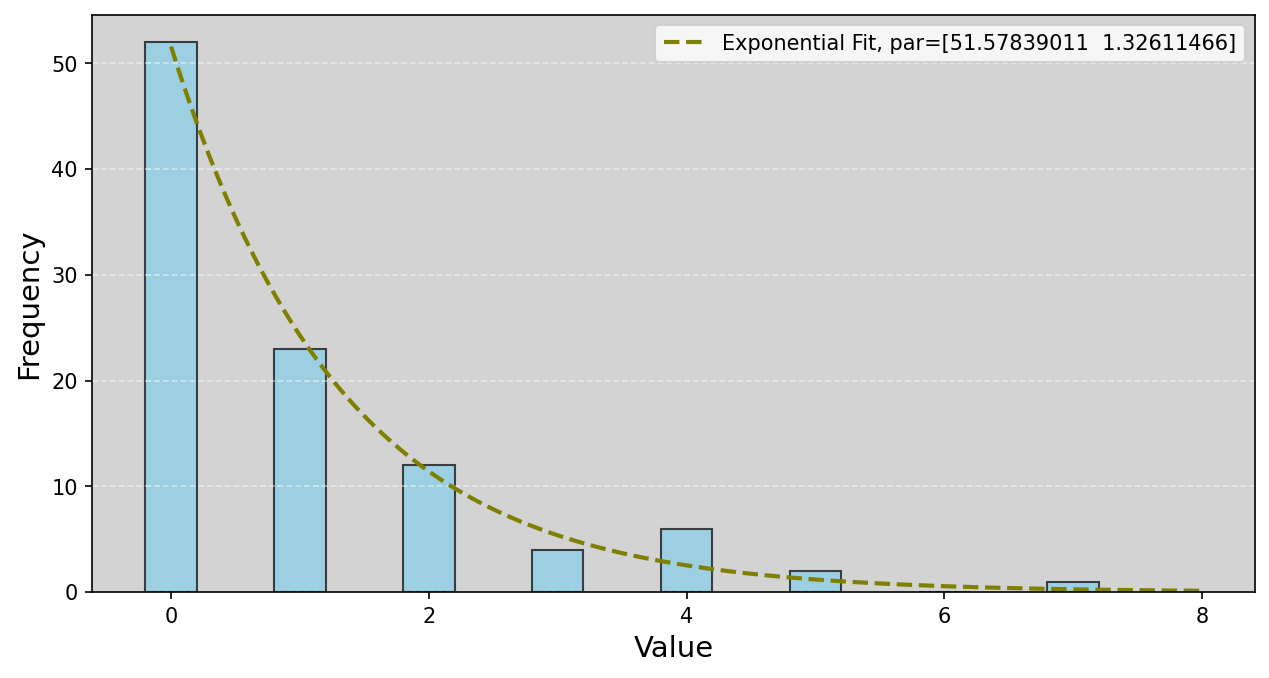

In [3]:
fig, ax = plt.subplots(dpi=150, figsize=(10,5))

vals, binedges, _ = plt.hist(init_val, bins=int(max(init_val)+1), range=(0, max(init_val)+1), histtype='bar', color='skyblue', alpha=0, edgecolor='black')
# Exponential fit
def exp(x, A, tau):
    return A * np.exp(-x/tau)


from scipy.optimize import curve_fit
popt_exp, pcov_exp = curve_fit(exp, binedges[:-1], vals, p0=(max(vals), 2))

x_fit = np.linspace(0, max(init_val+1), 1000)
y_fit_exp = exp(x_fit, *popt_exp)

ax.plot(x_fit, y_fit_exp, color='olive', linewidth=2, label='Exponential Fit, par=' + str(popt_exp), ls='--')
ax.bar(binedges[:-1], vals, width=0.4, color='skyblue', alpha=0.7, edgecolor='black')
ax.legend()

ax.set_facecolor('lightgrey')
ax.grid(True, linestyle='--', alpha=0.5, color='white', axis='y')
ax.set_xlabel('Value', fontsize=14)
ax.set_ylabel('Frequency', fontsize=14)

___

# Ising model

In [23]:
M = np.array(np.random.choice([-1, 1], (20, 20)))

def E_neighbor(M, i, j):
    E_ij = - M[i,j] * (np.roll(M, 1, axis=1)[i, j] + 
                     np.roll(M, -1, axis=1)[i, j] + 
                     np.roll(M, 1, axis=0)[i, j] + 
                     np.roll(M, -1, axis=0)[i, j]
                    )
    return np.sum(E_ij)


def tot_E(M):
    E = - 0.5 * M * (np.roll(M, 1, axis=0) + 
                     np.roll(M, -1, axis=0) + 
                     np.roll(M, 1, axis=1) + 
                     np.roll(M, -1, axis=1)
                    )
    return np.sum(E)

def mag(M):
    return np.sum(M) / M.size


def ising_model(M_init, J, kb, T, n_it, n0):
    n = 0
    E_list = []
    mag_list = []
    M = M_init.copy()

    while n < n_it:
        # Draw random i and j
        i, j = np.random.randint(0, M.shape[0], 2)

        # Flip spin
        M_flip = M.copy()
        M_flip[i, j] *= -1


        E_ij = E_neighbor(M, i, j)
        E_ij_flip = E_neighbor(M_flip, i, j)

        if E_ij_flip < E_ij:
            M = M_flip.copy()
        else: 
            r = np.random.uniform()
            if r < np.exp(-(E_ij_flip - E_ij) /(kb * T)):
                M = M_flip.copy()
            else:
                M = M.copy()        
        n += 1

        if n > n0:

            E_tot = tot_E(M) 
            mag_tot = mag(M)
            E_list.append(E_tot)
            mag_list.append(mag_tot)

    return E_list, mag_list



In [26]:
n_it = 1000000
n0 = n_it // 4
J = 1 
kb = 1
T = 2



E_list, mag_list = ising_model(M, J, kb, T, n_it, n0)
norm_list = range(1, (n_it - n0)+1)
E_list_sum = np.cumsum(E_list) / norm_list


Text(0.5, 1.0, 'Magnetization')

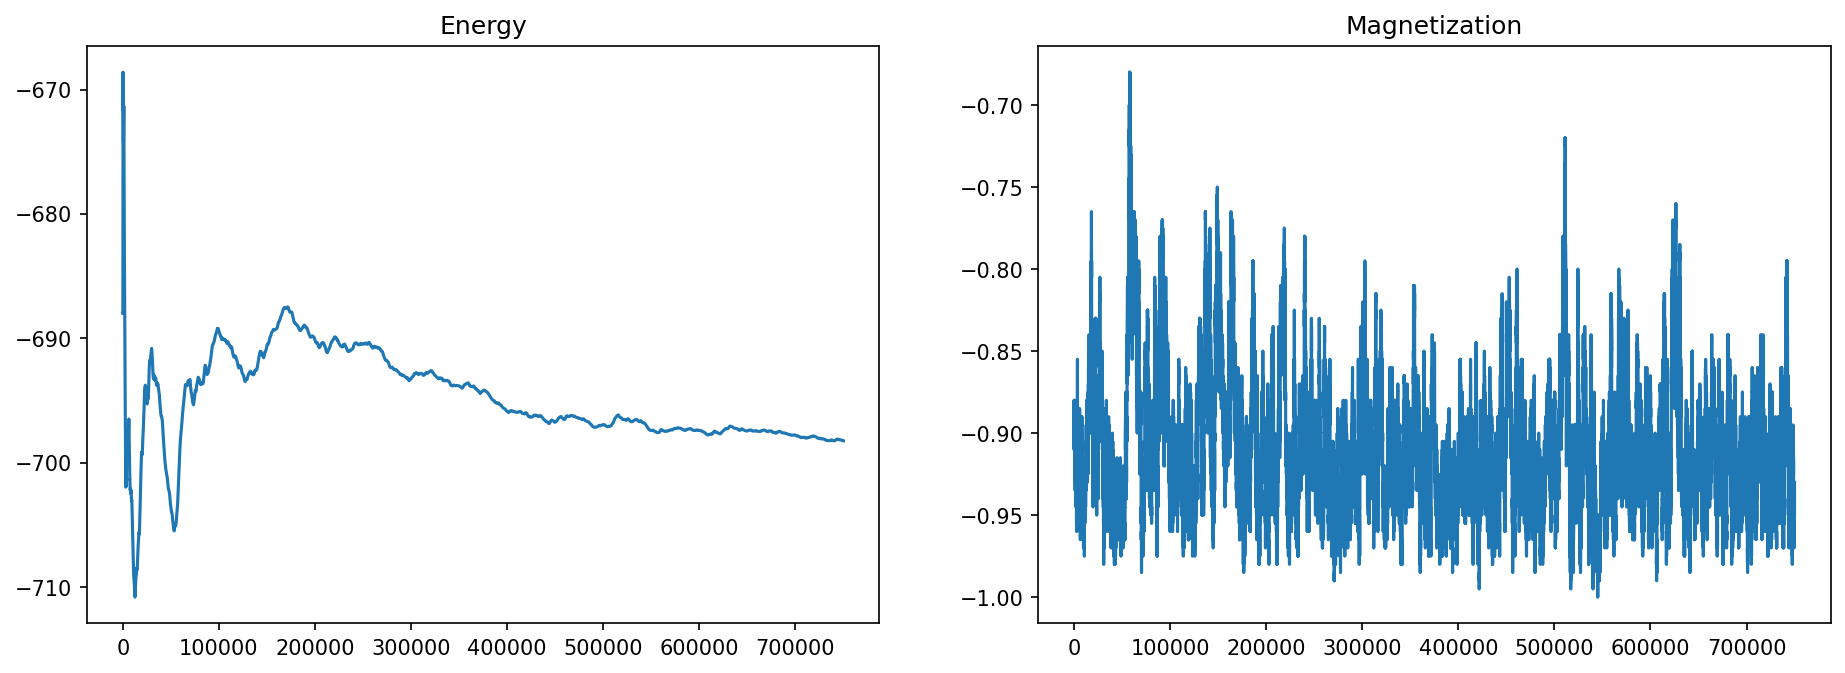

In [28]:
fig, ax = plt.subplots(1, 2, dpi=150, figsize=(15,5))
ax[0].plot(E_list_sum)
ax[0].set_title("Energy")
ax[1].plot(mag_list)
ax[1].set_title("Magnetization")